### A Convolutional Neural Network (CNN) model

It can be effectively used for time series forecasting by leveraging its ability to capture patterns in sequential data. Traditionally used for image processing, CNNs can be adapted for time series data by applying convolutions along the temporal dimension.

__How CNN Models Work for Time Series:__

__1. Convolutional Layers:__

- Treat time series data as a 1D signal where each time step is a feature.
- Filters (kernels) slide over the data to extract local patterns.
- Convolutions capture relationships and patterns within the time series.

__2. Pooling Layers:__

- Downsample the feature maps from convolutional layers, reducing their size while preserving important features.
- Common pooling methods include max pooling (selects the maximum value) and average pooling (calculates the average value) within each pooling window.

__3. Flattening and Fully Connected Layers:__

- Flatten the output from convolutional and pooling layers into a 1D vector.
- Feed this vector into fully connected (dense) layers to learn high-level representations.
- These layers perform classification or regression tasks based on the learned features.

__4. Output Layer:__

- For forecasting, the output layer may have a single neuron (predicting the next data point) or multiple neurons (predicting future values).

__5. Training:__

- Train the CNN using labeled time series data with supervised learning.
- Minimize a loss function that measures the difference between predicted and actual values.
- Use optimization algorithms like stochastic gradient descent (SGD) or Adam to update model parameters.

__Useful links:__

- https://www.youtube.com/watch?v=YRhxdVk_sIs- 
https://www.youtube.com/watch?v=JboZfxUjLSk

### 1. Univariate Convolutional Neural Network models

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Although traditionally developed for two-dimensional image data, CNNs can be used to model
univariate time series forecasting problems.

In [2]:
def split_sequence(sequence, n_steps):
    X, y = [], []  # Initialize empty lists for inputs and outputs
    
    for i in range(len(sequence) - n_steps):
        # Extract input sequence of length n_steps and corresponding output
        seq_x, seq_y = sequence[i:i + n_steps], sequence[i + n_steps]
        
        X.append(seq_x)  # Append the input sequence to X
        y.append(seq_y)  # Append the output value to y

    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return

In [3]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


### CNN Model

A one-dimensional CNN is a CNN model that has a convolutional hidden layer that operates over a 1D sequence.
A one-dimensional Convolutional Neural Network (1D CNN) is designed to process sequential data, like time series. Here's how it works:

__1. Convolutional Layer:__ The first layer applies filters to the 1D sequence to detect patterns. If the input sequence is very long, an additional convolutional layer might be used to further refine these patterns.

__2. Pooling Layer:__ It condenses the output from the convolutional layer, highlighting the most important features and reducing the data's dimensionality.

__3. Flatten Layer:__ After the convolutional and pooling layers, the data is flattened into a single 1D vector. This step prepares the data for the next layer.

__4. Dense Fully Connected Layer:__ Finally, a dense layer interprets the features extracted by the previous layers and makes predictions.

This structure allows the 1D CNN to efficiently learn and recognize patterns in sequential data, making it a powerful tool for tasks like time series forecasting. 

The input shape for each sample is specified in the input shape argument on the definition 
of the first hidden layer. We almost always have multiple samples, therefore, the model wil 
expect the input component of training data to have the dimensions or shape: [sample , timesteps, features]. 

In [4]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [5]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Define the Sequential model
model = Sequential()

# Add a 1D convolutional layer with 64 filters, kernel size of 2, ReLU activation
# The input shape is defined by n_steps (timesteps) and n_features
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))

# Add a max pooling layer to reduce the dimensionality of the data
# Pool size of 2 means it reduces the input size by half
model.add(MaxPooling1D(pool_size=2))

# Flatten the data to convert the 2D matrix into a 1D vector
# This prepares the data for the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 50 neurons and ReLU activation
# This layer interprets the features extracted by the convolutional layers
model.add(Dense(50, activation='relu'))

# Add the output layer with a single neuron
# No activation function is specified, meaning it will use a linear activation by default
model.add(Dense(1))

# Compile the model using the Adam optimizer and mean squared error (MSE) loss function
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=2000, verbose=0)

In [6]:
# Demonstrate prediction
x_input = np.array([70, 80, 90]).reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat

array([[101.03959]], dtype=float32)

### 2. Multivariate CNN Models

### 2.1. Multiple Input Series
In some cases, you may have multiple input time series running in parallel, along with an output time series that depends on these inputs. The input series are considered parallel because they have observations recorded at the same time steps.

In [8]:
# Define input sequence
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = np.array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

In [9]:
# Define input sequences
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95]).reshape(-1, 1)

# Define output sequence as the sum of input sequences
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Horizontally stack columns to form the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# prints the dataset with one row per time step and one column for each of the two input and one output parallel time series
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


A 1D CNN model needs sufficient context to learn a mapping from an
input sequence to an output value. CNNs can support parallel input time series as separate
channels, like red, green, and blue components of an image. Therefore, we need to split the data into samples maintaining the order of observations across the two input sequences. 

In [11]:
def split_sequences(sequences, n_steps):
    X, y = [], []  # Initialize empty lists for inputs and outputs
    
    for i in range(len(sequences) - n_steps + 1):
        # Define the end index of the current sequence pattern
        end_ix = i + n_steps
        
        # Extract input and output parts of the pattern
        seq_x = sequences[i:end_ix, :-1]
        seq_y = sequences[end_ix - 1, -1]
        
        X.append(seq_x)  # Append input sequence to X
        y.append(seq_y)  # Append output value to y
    
    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return

In [12]:
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


- The first dimension represents the __number of samples__, which is __7__ in this case.
- The second dimension is the __number of time steps per sample__, set to __3__ as specified in the function.
- The last dimension indicates the __number of__ parallel time series or __variables__, which is __2__ for the two parallel series.

In [14]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

n_features = X.shape[2]

# Define the Sequential model
model = Sequential()

# Add a 1D convolutional layer with 64 filters, kernel size of 2, and ReLU activation
# The input shape is defined by n_steps (timesteps) and n_features
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))

# Add a max pooling layer to reduce the dimensionality of the data
# Pool size of 2 means it reduces the input size by half
model.add(MaxPooling1D(pool_size=2))

# Flatten the data to convert the 2D matrix into a 1D vector
# This prepares the data for the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 50 neurons and ReLU activation
# This layer interprets the features extracted by the convolutional layers
model.add(Dense(50, activation='relu'))

# Add the output layer with a single neuron
# No activation function is specified, meaning it will use a linear activation by default
model.add(Dense(1))

# Compile the model using the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset
model.fit(X, y, epochs=2000, verbose=0)

# Demonstrate prediction
# Define a new input sample
x_input = np.array([[80, 85], [90, 95], [100, 105]])
# Reshape input to match the model's expected input shape (1 sample, n_steps, n_features)
x_input = x_input.reshape((1, n_steps, n_features))

# Make a prediction using the model
yhat = model.predict(x_input, verbose=0)

# Print the predicted output
print(yhat)

[[206.97939]]


#### Multi-headed CNN Model

A multi-headed CNN model offers a more sophisticated way to handle multiple input series. Each input series is processed by a separate CNN, and the outputs of these submodels are combined before making the final prediction. This approach can provide greater flexibility and potentially better performance. For instance, you can customize each submodel with different configurations, such as varying the number of filters and kernel sizes, to better suit each input series.

In [34]:
from IPython.display import Image, display
display(Image(url='multiheaded.png'))

In [18]:
# Define input sequences
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95]).reshape(-1, 1)
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Horizontally stack columns to form the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# Choose the number of time steps
n_steps = 3

# Convert dataset into input/output
X, y = split_sequences(dataset, n_steps)

# Reshape input data for each time series (one feature per head)
n_features = 1
X1 = X[:, :, 0].reshape((X.shape[0], X.shape[1], n_features))
X2 = X[:, :, 1].reshape((X.shape[0], X.shape[1], n_features))

In [20]:
X

array([[[10, 15],
        [20, 25],
        [30, 35]],

       [[20, 25],
        [30, 35],
        [40, 45]],

       [[30, 35],
        [40, 45],
        [50, 55]],

       [[40, 45],
        [50, 55],
        [60, 65]],

       [[50, 55],
        [60, 65],
        [70, 75]],

       [[60, 65],
        [70, 75],
        [80, 85]],

       [[70, 75],
        [80, 85],
        [90, 95]]])

In [19]:
X1

array([[[10],
        [20],
        [30]],

       [[20],
        [30],
        [40]],

       [[30],
        [40],
        [50]],

       [[40],
        [50],
        [60]],

       [[50],
        [60],
        [70]],

       [[60],
        [70],
        [80]],

       [[70],
        [80],
        [90]]])

In [21]:
X2

array([[[15],
        [25],
        [35]],

       [[25],
        [35],
        [45]],

       [[35],
        [45],
        [55]],

       [[45],
        [55],
        [65]],

       [[55],
        [65],
        [75]],

       [[65],
        [75],
        [85]],

       [[75],
        [85],
        [95]]])

In [26]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Define the first input model
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
cnn1 = MaxPooling1D(pool_size=2)(cnn1)
cnn1 = Flatten()(cnn1)

# Define the second input model
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible2)
cnn2 = MaxPooling1D(pool_size=2)(cnn2)
cnn2 = Flatten()(cnn2)

# Merge input models
merged = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merged)
output = Dense(1)(dense)

# Define the multi-headed model
model = Model(inputs=[visible1, visible2], outputs=output)
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit([X1, X2], y, epochs=2000, verbose=0)

# Demonstrate prediction
x_input = np.array([[80, 85], [90, 95], [100, 105]])
x1 = x_input[:, 0].reshape((1, n_steps, n_features))
x2 = x_input[:, 1].reshape((1, n_steps, n_features))

# Make prediction
yhat = model.predict([x1, x2], verbose=0)
print(yhat)

[[205.42633]]


### 2.2. Multiple Parallel Series

Another type of time series problem involves multiple parallel time series where a value must be predicted for each series at the next time step. This is known as multivariate forecasting. For example, if we have three parallel time series, we want to predict the next value for each of these three series simultaneously. This approach allows us to capture the relationships and dependencies between the different series, potentially improving the accuracy of our predictions.

In [27]:
# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = [], []  # Initialize empty lists for inputs and outputs
    for i in range(len(sequences) - n_steps):
        # Define the end index of the current sequence pattern
        end_ix = i + n_steps
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)  # Append input sequence to X
        y.append(seq_y)  # Append output sequence to y
    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return

# Define input sequences
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95]).reshape(-1, 1)

# Define output sequence as the sum of input sequences
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Horizontally stack columns to form the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# Choose the number of time steps
n_steps = 3

# Convert dataset into input/output pairs
X, y = split_sequences(dataset, n_steps)

# Print the shapes of the input and output arrays
print(X.shape, y.shape)

# Summarize the data
for i in range(len(X)):
    print(X[i], y[i])

(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


__The shape of X is three-dimensional__ and consists of:

- Number of samples: This is the total number of samples in the dataset (6).
- Number of time steps per sample: Each sample contains 3 time steps.
- Number of parallel time series or features: There are 3 parallel time series in each sample.


__The shape of y is two-dimensional__ and consists of:

- Number of samples: This matches the number of samples in X (6).
- Number of time variables per sample to be predicted: Each sample's prediction includes 3 time variables.

In [29]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

n_features = X.shape[2]

# Define the Sequential model
model = Sequential()

# Add a 1D convolutional layer with 64 filters, kernel size of 2, and ReLU activation
# The input shape is defined by n_steps (timesteps) and n_features (number of features)
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))

# Add a max pooling layer to reduce the dimensionality of the data
# Pool size of 2 means it reduces the input size by half
model.add(MaxPooling1D(pool_size=2))

# Flatten the data to convert the 2D matrix into a 1D vector
# This prepares the data for the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 50 neurons and ReLU activation
# This layer interprets the features extracted by the convolutional layers
model.add(Dense(50, activation='relu'))

# Add the output layer with neurons equal to the number of features
# This will produce an output for each feature in the time series
model.add(Dense(n_features))

# Compile the model using the Adam optimizer and mean squared error (MSE) loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset
# Train the model for 3000 epochs
model.fit(X, y, epochs=3000, verbose=0)

In [31]:
# Demonstrate prediction
# Define a new input sample
x_input = np.array([[70, 75, 145], [80, 85, 165], [90, 95, 185]])
# Reshape input to match the model's expected input shape (1 sample, n_steps, n_features)
x_input = x_input.reshape((1, n_steps, n_features))

# Make a prediction using the model
yhat = model([x_input])

# Print the predicted output
print(yhat)

tf.Tensor([[100.88985 106.37772 207.48064]], shape=(1, 3), dtype=float32)


#### Multi-output CNN Model

Similar to handling multiple input series, there is a more advanced way to model the problem using multiple output series. Each output series can be managed by a separate CNN model, referred to as a multi-output CNN model. This approach may provide greater flexibility or improved performance, depending on the specifics of the problem being modeled.

In [35]:
display(Image(url='multioutput.png'))

In [36]:
# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = [], []  # Initialize empty lists for inputs and outputs
    for i in range(len(sequences) - n_steps):
        # Define the end index of the current sequence pattern
        end_ix = i + n_steps
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)  # Append input sequence to X
        y.append(seq_y)  # Append output sequence to y
    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return

In [38]:
# Define input sequences
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95]).reshape(-1, 1)
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Horizontally stack columns to form the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# Choose the number of time steps
n_steps = 3

# Convert dataset into input/output pairs
X, y = split_sequences(dataset, n_steps)

# The number of features
n_features = X.shape[2]

# Separate output into individual series
y1, y2, y3 = y[:, 0], y[:, 1], y[:, 2]

In [40]:
X

array([[[ 10,  15,  25],
        [ 20,  25,  45],
        [ 30,  35,  65]],

       [[ 20,  25,  45],
        [ 30,  35,  65],
        [ 40,  45,  85]],

       [[ 30,  35,  65],
        [ 40,  45,  85],
        [ 50,  55, 105]],

       [[ 40,  45,  85],
        [ 50,  55, 105],
        [ 60,  65, 125]],

       [[ 50,  55, 105],
        [ 60,  65, 125],
        [ 70,  75, 145]],

       [[ 60,  65, 125],
        [ 70,  75, 145],
        [ 80,  85, 165]]])

In [41]:
y

array([[ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [42]:
y1

array([40, 50, 60, 70, 80, 90])

In [43]:
y2

array([45, 55, 65, 75, 85, 95])

In [44]:
y3

array([ 85, 105, 125, 145, 165, 185])

In [45]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Define the model
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(filters=64, kernel_size=2, activation='relu')(visible)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

# Define three separate outputs
output1 = Dense(1)(cnn)
output2 = Dense(1)(cnn)
output3 = Dense(1)(cnn)

# Tie together the input and output models
model = Model(inputs=visible, outputs=[output1, output2, output3])
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, [y1, y2, y3], epochs=2000, verbose=0)

In [46]:
# Demonstrate prediction
x_input = np.array([[70, 75, 145], [80, 85, 165], [90, 95, 185]])
x_input = x_input.reshape((1, n_steps, n_features))

# Make a prediction using the model
yhat = model([x_input])

# Print the predicted output
print(yhat)

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[101.52337]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[107.027016]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[208.56056]], dtype=float32)>]


In [48]:
# Extract numerical values from the tensors
[tensor.numpy()[0, 0] for tensor in yhat]

[101.52337, 107.027016, 208.56056]

### 3. Multi-step CNN Models

Multi-step forecasting involves predicting a sequence of future values rather than just a single future value. This approach is essential in many real-world applications such as weather forecasting, stock market prediction, and energy demand forecasting, where anticipating future trends over multiple time steps can provide more actionable insights.

In [49]:
# Function to split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []  # Initialize empty lists for inputs and outputs
    for i in range(len(sequence) - n_steps_in - n_steps_out + 1):
        # Define the end index of the input sequence
        end_ix = i + n_steps_in
        # Define the end index of the output sequence
        out_end_ix = end_ix + n_steps_out
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)  # Append input sequence to X
        y.append(seq_y)  # Append output sequence to y
    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return

In [50]:
# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Choose the number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Split the raw sequence into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# Summarize the data
for i in range(len(X)):
    print(f"Input: {X[i]}, Output: {y[i]}")

Input: [10 20 30], Output: [40 50]
Input: [20 30 40], Output: [50 60]
Input: [30 40 50], Output: [60 70]
Input: [40 50 60], Output: [70 80]
Input: [50 60 70], Output: [80 90]


In [51]:
X

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50],
       [40, 50, 60],
       [50, 60, 70]])

In [53]:
X.shape  # (sample size, no. of time steps)

(5, 3)

In [54]:
# Reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [56]:
X.shape

(5, 3, 1)

In [55]:
X

array([[[10],
        [20],
        [30]],

       [[20],
        [30],
        [40]],

       [[30],
        [40],
        [50]],

       [[40],
        [50],
        [60]],

       [[50],
        [60],
        [70]]])

In [57]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Define the model
model = Sequential([
    # Add a 1D convolutional layer with 64 filters, kernel size of 2, and ReLU activation
    # The input shape is defined by n_steps_in (timesteps) and n_features (number of features)
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    
    # Add a max pooling layer to reduce the dimensionality of the data
    # Pool size of 2 means it reduces the input size by half
    MaxPooling1D(pool_size=2),
    
    # Flatten the data to convert the 2D matrix into a 1D vector
    # This prepares the data for the fully connected layers
    Flatten(),
    
    # Add a dense (fully connected) layer with 50 neurons and ReLU activation
    Dense(50, activation='relu'),
    
    # Add the output layer with neurons equal to the number of steps we want to predict (n_steps_out)
    Dense(n_steps_out)
])

# Compile the model using the Adam optimizer and mean squared error (MSE) loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset (X, y)
# Train the model for 3000 epochs
model.fit(X, y, epochs=3000, verbose=0)

In [58]:
# Demonstrate prediction
# Define a new input sample
x_input = np.array([70, 80, 90]).reshape((1, n_steps_in, n_features))

# Make a prediction using the model
yhat = model([x_input])

# Print the predicted output
print(yhat)

tf.Tensor([[103.391266 116.10647 ]], shape=(1, 2), dtype=float32)


### 4. Multivariate Multi-step CNN Models

### 4.1. Multiple Input Multi-step Output

In [59]:
# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []  # Initialize empty lists for inputs and outputs
    for i in range(len(sequences) - n_steps_in - n_steps_out + 1):
        # Define the end index of the input sequence
        end_ix = i + n_steps_in
        # Define the end index of the output sequence
        out_end_ix = end_ix + n_steps_out - 1
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)  # Append input sequence to X
        y.append(seq_y)  # Append output sequence to y
    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return

In [65]:
# Define input sequences
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95]).reshape(-1, 1)

# Define output sequence as the sum of input sequences
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Horizontally stack columns to form the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# Choose the number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Convert dataset into input/output pairs
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# Print the shapes of the input and output arrays
print(X.shape, y.shape)

# Summarize the data
for i in range(len(X)):
    print(f"Input:\n {X[i]}, Output: {y[i]}")
    print('=' * 50)

(5, 3, 2) (5, 2)
Input:
 [[10 15]
 [20 25]
 [30 35]], Output: [65 85]
Input:
 [[20 25]
 [30 35]
 [40 45]], Output: [ 85 105]
Input:
 [[30 35]
 [40 45]
 [50 55]], Output: [105 125]
Input:
 [[40 45]
 [50 55]
 [60 65]], Output: [125 145]
Input:
 [[50 55]
 [60 65]
 [70 75]], Output: [145 165]


In [66]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Number of features in the dataset
n_features = X.shape[2]

# Define the model
model = Sequential([
    # Add a 1D convolutional layer with 64 filters, kernel size of 2, and ReLU activation
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    
    # Add a max pooling layer to reduce the dimensionality of the data
    MaxPooling1D(pool_size=2),
    
    # Flatten the data to convert the 2D matrix into a 1D vector
    Flatten(),
    
    # Add a dense (fully connected) layer with 50 neurons and ReLU activation
    Dense(50, activation='relu'),
    
    # Add the output layer with neurons equal to the number of steps we want to predict (n_steps_out)
    Dense(n_steps_out)
])

# Compile the model using the Adam optimizer and mean squared error (MSE) loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset (X, y) for 2000 epochs
model.fit(X, y, epochs=2000, verbose=0)

In [68]:
# Demonstrate prediction
# Define a new input sample
x_input = np.array([[70, 75], [80, 85], [90, 95]])
# Reshape input to match the model's expected input shape (1 sample, n_steps_in, n_features)
x_input = x_input.reshape((1, n_steps_in, n_features))

# Make a prediction using the model
yhat = model([x_input])

# Print the predicted output
print(yhat)

tf.Tensor([[186.48712 211.64996]], shape=(1, 2), dtype=float32)


### 4.2. Multiple Parallel Input and Multi-step Output

A problem with parallel time series may require the prediction of multiple time steps of each 
time series. 

In [69]:
# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []  # Initialize empty lists for inputs and outputs
    for i in range(len(sequences) - n_steps_in - n_steps_out + 1):
        # Define the end index of the input sequence
        end_ix = i + n_steps_in
        # Define the end index of the output sequence
        out_end_ix = end_ix + n_steps_out
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)  # Append input sequence to X
        y.append(seq_y)  # Append output sequence to y
    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return

In [72]:
# Define input sequences
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95]).reshape(-1, 1)

# Define output sequence as the sum of input sequences
out_seq = (in_seq1 + in_seq2).reshape(-1, 1)

# Horizontally stack columns to form the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# Choose the number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Convert dataset into input/output pairs
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# Print the shapes of the input and output arrays
print(X.shape, y.shape)

# Summarize the data
for i in range(len(X)):
    print(f"Input:\n {X[i]}, \nOutput: \n{y[i]}")
    print('=' * 50)

(5, 3, 3) (5, 2, 3)
Input:
 [[10 15 25]
 [20 25 45]
 [30 35 65]], 
Output: 
[[ 40  45  85]
 [ 50  55 105]]
Input:
 [[20 25 45]
 [30 35 65]
 [40 45 85]], 
Output: 
[[ 50  55 105]
 [ 60  65 125]]
Input:
 [[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]], 
Output: 
[[ 60  65 125]
 [ 70  75 145]]
Input:
 [[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]], 
Output: 
[[ 70  75 145]
 [ 80  85 165]]
Input:
 [[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]], 
Output: 
[[ 80  85 165]
 [ 90  95 185]]


In [73]:
# Flatten output to match the required shape for the model
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

# Number of features in the dataset
n_features = X.shape[2]

In [74]:
y

array([[ 40,  45,  85,  50,  55, 105],
       [ 50,  55, 105,  60,  65, 125],
       [ 60,  65, 125,  70,  75, 145],
       [ 70,  75, 145,  80,  85, 165],
       [ 80,  85, 165,  90,  95, 185]])

In [77]:
# Set the seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Define the model
model = Sequential([
    # Add a 1D convolutional layer with 64 filters, kernel size of 2, and ReLU activation
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    
    # Add a max pooling layer to reduce the dimensionality of the data
    MaxPooling1D(pool_size=2),
    
    # Flatten the data to convert the 2D matrix into a 1D vector
    Flatten(),
    
    # Add a dense (fully connected) layer with 50 neurons and ReLU activation
    Dense(50, activation='relu'),
    
    # Add the output layer with neurons equal to the number of flattened output steps (n_output)
    Dense(n_output)
])

# Compile the model using the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model on the dataset (X, y) for 3000 epochs
model.fit(X, y, epochs=3000, verbose=0)

In [78]:
# Demonstrate prediction
# Define a new input sample
x_input = np.array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
# Reshape input to match the model's expected input shape (1 sample, n_steps_in, n_features)
x_input = x_input.reshape((1, n_steps_in, n_features))

# Make a prediction using the model
yhat = model([x_input])

# Print the predicted output
print(yhat)

tf.Tensor([[ 90.989784  96.45796  187.54951  101.92476  107.63591  209.56398 ]], shape=(1, 6), dtype=float32)


### Using Multi-headed CNN model for PJMW hourly data

In [5]:
df = pd.read_csv('PJMW_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077.0
2002-12-31 02:00:00,4939.0
2002-12-31 03:00:00,4885.0
2002-12-31 04:00:00,4857.0
2002-12-31 05:00:00,4930.0


In [6]:
# Resample the data to daily frequency, aggregating by sum
df_daily = df.PJMW_MW.resample('D').sum()

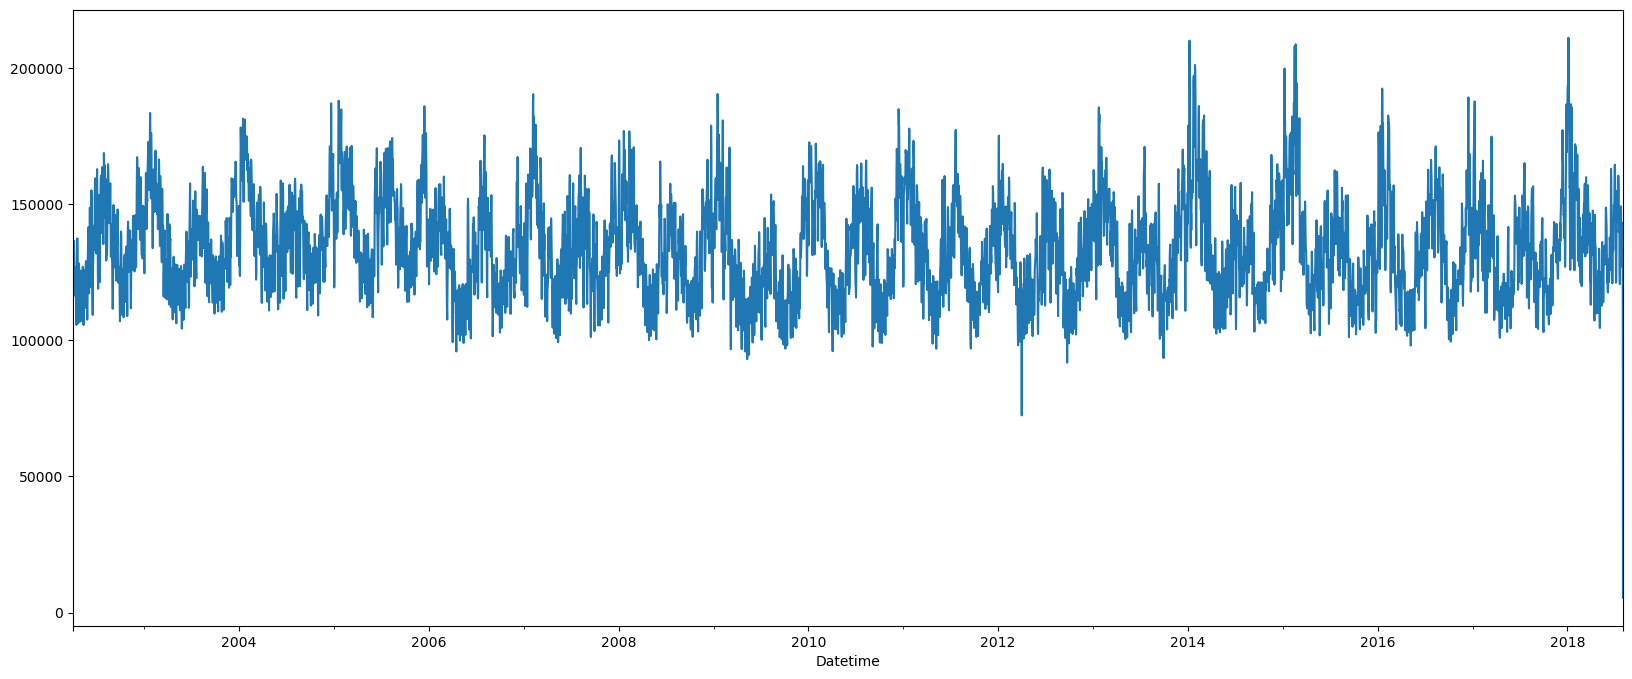

In [7]:
df_daily.plot(figsize=(20, 8));

In [12]:
def feature_engineering(dataframe):
    """
    Create time-based features from the datetime index of the DataFrame.
    
    Parameters:
    df (DataFrame): The input DataFrame with a datetime index.
    
    Returns:
    DataFrame: A new DataFrame with additional time-based features.
    """
    new_df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original
    new_df['dayofweek'] = dataframe.index.dayofweek
    new_df['quarter'] = dataframe.index.quarter
    new_df['month'] = dataframe.index.month
    new_df['year'] = dataframe.index.year
    new_df['dayofyear'] = dataframe.index.dayofyear
    return new_df

# Apply the feature creation function to the DataFrame
df_eng = feature_engineering(df_daily)

In [13]:
df_eng

,PJMW_MW,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,
2002-04-01,121237.0,0,2,4,2002,91
2002-04-02,127450.0,1,2,4,2002,92
2002-04-03,127822.0,2,2,4,2002,93
2002-04-04,136099.0,3,2,4,2002,94
2002-04-05,136467.0,4,2,4,2002,95
...,...,...,...,...,...,...
2018-07-28,131659.0,5,3,7,2018,209
2018-07-29,127052.0,6,3,7,2018,210
2018-07-30,131825.0,0,3,7,2018,211


In [19]:
def create_multivariate_data(df, window_size):
    """
    Convert the DataFrame to a multivariate dataset for MLP with a sliding window approach.
    
    Parameters:
    df (DataFrame): The input DataFrame.
    window_size (int): The size of the sliding window (e.g., 7 for a week).
    
    Returns:
    X, y (numpy arrays): Multivariate input features and target values.
    """
    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(df.iloc[i:i + window_size].values)
        y.append(df.iloc[i + window_size]['PJMW_MW'])
    return np.array(X), np.array(y)

In [20]:
X, y = create_multivariate_data(df_eng, 7)

In [21]:
X[0]

array([[1.21237e+05, 0.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.10000e+01],
       [1.27450e+05, 1.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.20000e+01],
       [1.27822e+05, 2.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.30000e+01],
       [1.36099e+05, 3.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.40000e+01],
       [1.36467e+05, 4.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.50000e+01],
       [1.28827e+05, 5.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.60000e+01],
       [1.16395e+05, 6.00000e+00, 2.00000e+00, 4.00000e+00, 2.00200e+03,
        9.70000e+01]])

In [24]:
X1 = X[:, :, 0]
X2 = X[:, :, 1]
X3 = X[:, :, 2]
X4 = X[:, :, 3]
X5 = X[:, :, 4]
X6 = X[:, :, 5]

In [31]:
# Split data into training, validation, and test sets (60% training, 20% validation, 20% testing)
X1_train, X1_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.4, random_state=seed)
X1_val, X1_test, y_val, y_test = train_test_split(X1_temp, y_temp, test_size=0.5, random_state=seed)

X2_train, X2_temp, _, _ = train_test_split(X2, y, test_size=0.4, random_state=seed)
X2_val, X2_test, _, _ = train_test_split(X2_temp, y_temp, test_size=0.5, random_state=seed)

X3_train, X3_temp, _, _ = train_test_split(X3, y, test_size=0.4, random_state=seed)
X3_val, X3_test, _, _ = train_test_split(X3_temp, y_temp, test_size=0.5, random_state=seed)

X4_train, X4_temp, _, _ = train_test_split(X4, y, test_size=0.4, random_state=seed)
X4_val, X4_test, _, _ = train_test_split(X4_temp, y_temp, test_size=0.5, random_state=seed)

X5_train, X5_temp, _, _ = train_test_split(X5, y, test_size=0.4, random_state=seed)
X5_val, X5_test, _, _ = train_test_split(X5_temp, y_temp, test_size=0.5, random_state=seed)

X6_train, X6_temp, _, _ = train_test_split(X6, y, test_size=0.4, random_state=seed)
X6_val, X6_test, _, _ = train_test_split(X6_temp, y_temp, test_size=0.5, random_state=seed)

In [32]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define the number of time steps
n_steps = 7
n_features = 1  # Assuming each time step has a single feature

# First input model
visible1 = Input(shape=(n_steps, n_features))
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
flat1 = Flatten()(conv1)

# Second input model
visible2 = Input(shape=(n_steps, n_features))
conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible2)
flat2 = Flatten()(conv2)

# Third input model
visible3 = Input(shape=(n_steps, n_features))
conv3 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible3)
flat3 = Flatten()(conv3)

# Fourth input model
visible4 = Input(shape=(n_steps, n_features))
conv4 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible4)
flat4 = Flatten()(conv4)

# Fifth input model
visible5 = Input(shape=(n_steps, n_features))
conv5 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible5)
flat5 = Flatten()(conv5)

# Sixth input model
visible6 = Input(shape=(n_steps, n_features))
conv6 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible6)
flat6 = Flatten()(conv6)

# Merge input models
merged = concatenate([flat1, flat2, flat3, flat4, flat5, flat6])
dense1 = Dense(100, activation='relu')(merged)
output = Dense(1)(dense1)

# Create and compile the model
model_3 = Model(inputs=[visible1, visible2, visible3, visible4, visible5, visible6], outputs=output)
model_3.compile(optimizer='adam', loss='mse')

# Fit the model
history_3 = model_3.fit(
    [X1_train, X2_train, X3_train, X4_train, X5_train, X6_train], y_train,
    epochs=1000, verbose=1,
    validation_data=([X1_val, X2_val, X3_val, X4_val, X5_val, X6_val], y_val)
)

Epoch 1/1000
112/112 [==============================] - 0s 4ms/step - loss: 622656576.0000 - val_loss: 153813504.0000
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 127951016.0000 - val_loss: 100277600.0000
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 89028320.0000 - val_loss: 76126176.0000
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 75539608.0000 - val_loss: 75212464.0000
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 71065416.0000 - val_loss: 65752712.0000
Epoch 6/1000
112/112 [==============================] - 0s 2ms/step - loss: 68049544.0000 - val_loss: 65326164.0000
Epoch 7/1000
112/112 [==============================] - 0s 2ms/step - loss: 69639896.0000 - val_loss: 64482984.0000
Epoch 8/1000
112/112 [==============================] - 0s 2ms/step - loss: 67532240.0000 - val_loss: 79887712.0000
Epoch 9/1000
112/112 [==============================] - 0s 2ms/step 

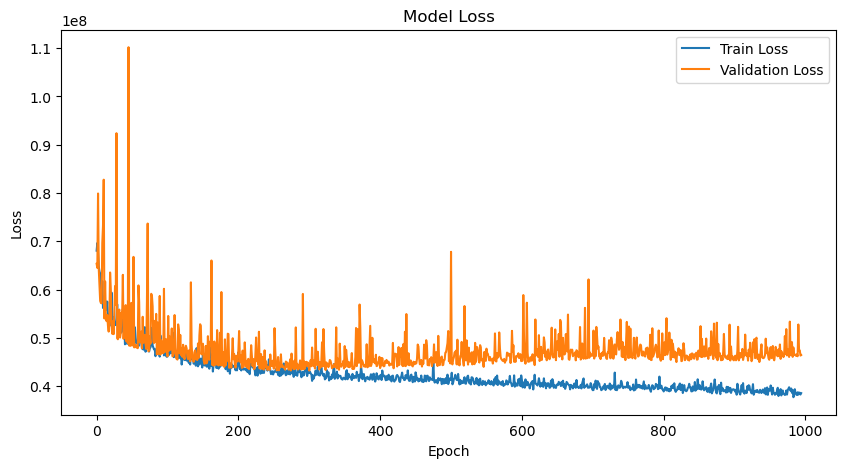

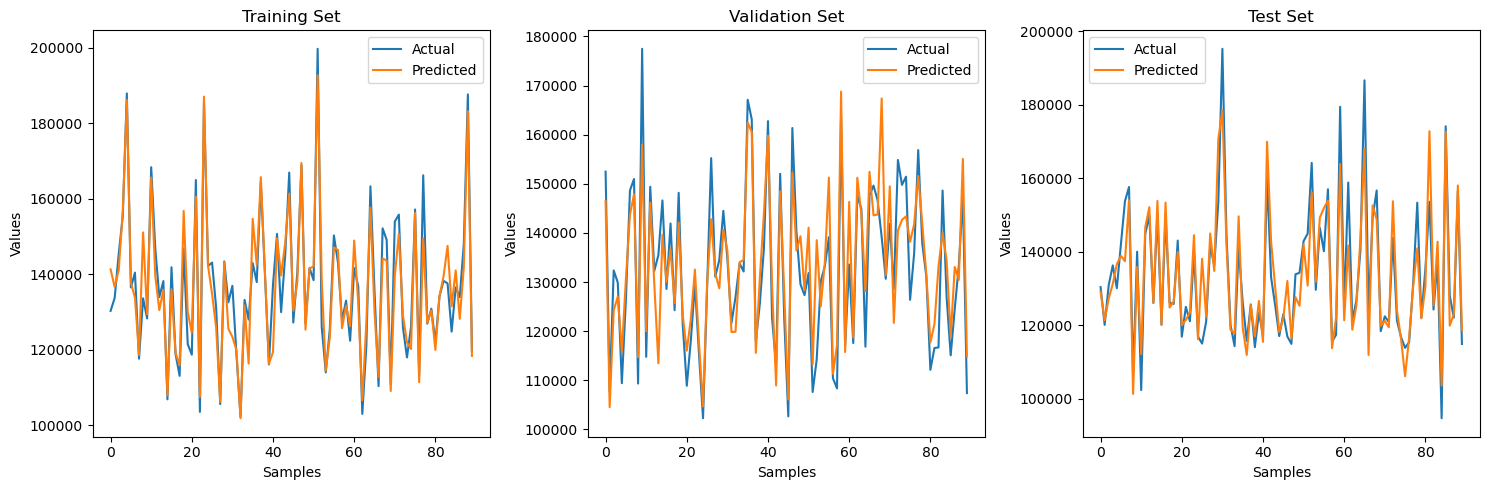

In [33]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['loss'][5:], label='Train Loss')
plt.plot(history_3.history['val_loss'][5:], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_3.predict([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train])
y_val_pred = model_3.predict([X1_val, X2_val, X3_val, X4_val, X5_val, X6_val])
y_test_pred = model_3.predict([X1_test, X2_test, X3_test, X4_test, X5_test, X6_test])

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train[-90:], label='Actual')
plt.plot(y_train_pred[-90:], label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val[-90:], label='Actual')
plt.plot(y_val_pred[-90:], label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test[-90:], label='Actual')
plt.plot(y_test_pred[-90:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
# Evaluate the model on the validation set and calculate RMSE
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
print(f'Validation RMSE for Dense Model: {val_rmse}')

# Evaluate the model on the test set and calculate RMSE
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print(f'Test RMSE for Dense Model: {test_rmse}')

Validation RMSE for Dense Model: 6814.078306352882
Test RMSE for Dense Model: 6969.405354483389


In [40]:
# Evaluate the model on the validation set and calculate MAPE
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
print(f'Validation MAPE for Dense Model: {val_mape:.2%}')

# Evaluate the model on the test set and calculate MAPE
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'Test MAPE for Dense Model: {test_mape:.2%}')

Validation MAPE for Dense Model: 3.70%
Test MAPE for Dense Model: 3.67%
